In [65]:
# # Importamos librerías 
# import numpy as np
# from functools import reduce
# import time
# import matplotlib.pyplot as plt
# import scipy.stats as st     # Librería estadística
# import pandas as pd
# from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st 
from scipy import optimize as opt 
from sklearn.neighbors import KernelDensity
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV

In [5]:
suicidios = pd.read_excel('Suicidios_Estados.xlsx', sheet_name='Tabulado', header=None).dropna()
suicidios = suicidios.drop(columns=[2,3,4,6,7,8,10,11,12])
suicidios.columns=['Estados','2017','2018','2019']
suicidios

,Estados,2017,2018,2019
5,Total,6559,6808,7223
6,Aguascalientes,140,140,157
7,Baja California,166,194,169
8,Baja California Sur,47,57,59
9,Campeche,74,69,95
10,Coahuila de Zaragoza,201,216,261
11,Colima,46,51,39
12,Chiapas,262,147,200
13,Chihuahua,405,365,400
14,Ciudad de México,302,227,234


In [6]:
mort = pd.read_excel('Mortalidad.xlsx', sheet_name='Tabulado', header=None).dropna()
mort = mort.drop(columns=[2,3,4,6,7,8,10,11,12])
mort.columns=['Estados','2017','2018','2019']
mort.head()

,Estados,2017,2018,2019
5,Total,703047,722611,747784
6,Aguascalientes,6158,6226,6768
7,Baja California,19073,20501,20924
8,Baja California Sur,3826,3447,3556
9,Campeche,4631,4835,5121


In [7]:
causas = pd.read_excel('Suicidios_Causas2.xlsx', sheet_name='Tabulado', header=None).dropna()
causas = causas.drop(columns=[2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27])
causas.columns=['Causas','2010','2011','2012','2013','2014','2015','2016','2017','2018']
# s_causa.head()
causas


,Causas,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,Total,5012,5718,5549,5909,6337,6425,6370,6559,6808
6,"Ahorcamiento, estrangulamiento o sofocación",3847,4406,4291,4554,5000,5092,5145,5266,5486
7,Disparo de arma de fuego,547,595,524,574,529,573,491,518,515
8,Envenenamiento,460,523,508,556,577,512,517,517,506
9,Otras causas,158,194,226,225,231,248,217,258,301


In [8]:
s_edad = pd.read_excel('Suicidios_Edad.xlsx', sheet_name='Tabulado', header=None).dropna()
s_edad = s_edad.drop(columns=[2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27])
s_edad.columns=['Causas','2010','2011','2012','2013','2014','2015','2016','2017','2018']
# s_causa.head()
s_edad

,Causas,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,Total,5012,5718,5549,5909,6337,6425,6370,6559,6808
6,10 a 14 años,187,249,208,174,243,236,228,209,229
7,15 a 19 años,685,859,826,780,761,861,774,795,800
8,20 a 24 años,761,916,877,875,1015,1010,1035,1027,1035
9,25 a 29 años,608,716,662,748,758,788,816,868,890
10,30 a 34 años,528,559,592,651,684,708,675,746,810
11,35 a 39 años,549,521,535,574,649,653,628,652,690
12,40 a 44 años,352,448,438,514,520,528,552,551,559
13,45 a 49 años,320,346,332,405,419,421,414,428,472
14,50 a 54 años,244,271,253,285,335,303,320,352,376


In [9]:
u_suic_anual= suicidios.mean()
u_suic = u_suic_anual.mean()

devest_suic_anual=suicidios.std()
devest_suic=devest_suic_anual.std()

print('Media de suicidios:', 'Desviación estd. Suicidios:',u_suic, devest_suic)

Media de suicidios: Desviación estd. Suicidios: 392.19047619047615 55.03269529590086


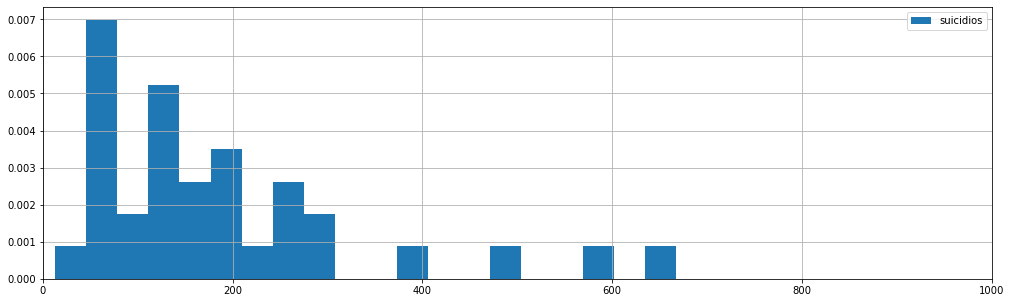

In [61]:
suic = pd.DataFrame({'Numero muertes': (suicidios['2017'].append(suicidios["2018"]).append(suicidios["2019"]))})
list_acc=list(suicidios.iloc[:,1])
x3=list(filter(lambda num: num != 0, list_acc))
# x3
bins=200
plt.figure(figsize=(17,5))
plt.hist(x3, bins, density= True, label= "suicidios")
plt.xlim((0,1000))
plt.legend(loc="best")
plt.grid()
plt.show()

In [66]:
#KERNEL
np.unique(x3, return_counts=True)
x3= np.array(x3)
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x1[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


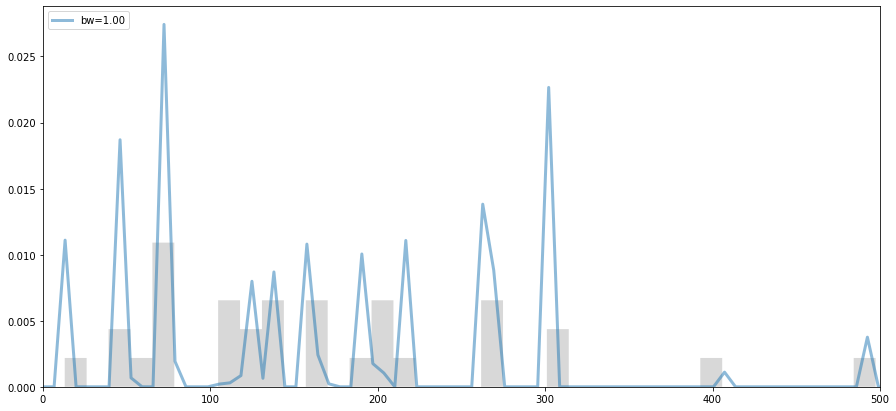

In [67]:
x_grid = np.linspace(0.1, x3.max(), 1000)
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:,None]))

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x1, 500, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 500);

In [68]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    plt.figure(figsize=(12,7)) 
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    return [R1[i] for i in range (len(R1)) if condition[i]]
           
    plt.show()
    
def f(x):
    return np.exp(np.array([grid.best_estimator_.score_samples(i)[0] for i in x]))

In [ ]:
N=50000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,x1.max(),N)
t= lambda x: max(pdf)Ñ*np.ones(len(x))
x= np.arange(0, x3.max(),1)

x1.reshape(1,-1)
x_generadas=Acep_rechazo(R2,R1,f,t)
plt.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
plt.plot()
plt.xlim((0,500))